# Kmeans

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [31]:
data = pd.read_csv('./weather/minute_weather.csv')

In [32]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [33]:
data.shape

(1587257, 13)

In [34]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,1587257.0,793628.000000,458201.772448,0.00,396814.0,793628.00,1190442.00,1587256.00
air_pressure,1587257.0,916.830127,3.051593,905.00,914.8,916.70,918.70,929.50
air_temp,1587257.0,61.851440,11.833624,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,1586824.0,161.965379,95.208120,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,1586824.0,2.774272,2.060758,0.00,1.3,2.20,3.80,32.30
max_wind_direction,1586824.0,163.403048,92.367234,0.00,68.0,187.00,223.00,359.00
max_wind_speed,1586824.0,3.399813,2.423167,0.10,1.6,2.70,4.60,36.00
min_wind_direction,1586824.0,166.826371,97.462746,0.00,77.0,180.00,212.00,359.00
min_wind_speed,1586824.0,2.133130,1.745345,0.00,0.8,1.60,3.00,32.00
rain_accumulation,1587256.0,0.001855,0.960972,0.00,0.0,0.00,0.00,655.01


In [35]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [36]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [37]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [38]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [40]:
rows_before - rows_after

46

In [41]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [44]:
features = ['air_pressure', 'air_temp','avg_wind_direction', 'avg_wind_speed',
            'max_wind_direction', 'max_wind_speed', 'relative_humidity']

In [45]:
select_df = sampled_df[features]

select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [47]:
X = StandardScaler().fit_transform(select_df)

In [49]:
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [51]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [54]:
centers = model.cluster_centers_
print(centers)

[[-1.17749235 -0.87879088  0.44625371  1.97377554  0.53828989  1.93527663
   0.91712429]
 [ 0.74466191  0.42319108  0.28954633 -0.52526562  0.47638667 -0.53140405
  -0.77170633]
 [-0.16479387  0.86455164 -1.31063488 -0.58965642 -1.16641125 -0.60491884
  -0.64103987]
 [ 0.25631178 -0.99346925  0.66142056 -0.54760859  0.85265245 -0.53002637
   1.15701839]
 [-0.68344155  0.55668379  0.17881302 -0.58863633  0.34920793 -0.6018891
  -0.12603661]
 [ 1.19105859 -0.25422996 -1.15485131  2.11944328 -1.05322813  2.23625936
  -1.13474906]
 [ 1.36525868 -0.08072397 -1.20797538 -0.05435448 -1.07656323 -0.03445487
  -0.97670309]
 [ 0.05782671 -0.78673745 -1.19591398 -0.5703938  -1.04186691 -0.58485973
   0.87816791]
 [ 0.13132715  0.84315353  1.41170287 -0.63891436  1.67591413 -0.58975629
  -0.71431515]
 [ 0.23331255  0.31921534  1.8878685  -0.65203316 -1.55161591 -0.5768706
  -0.28273108]
 [-0.21673129  0.62956308  0.40802968  0.73621553  0.51601101  0.67400338
  -0.14751255]
 [-0.84277075 -1.196817

# Plots

In [55]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [56]:
# Function that creates Parallel Plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [57]:
P = pd_centers(features, centers)

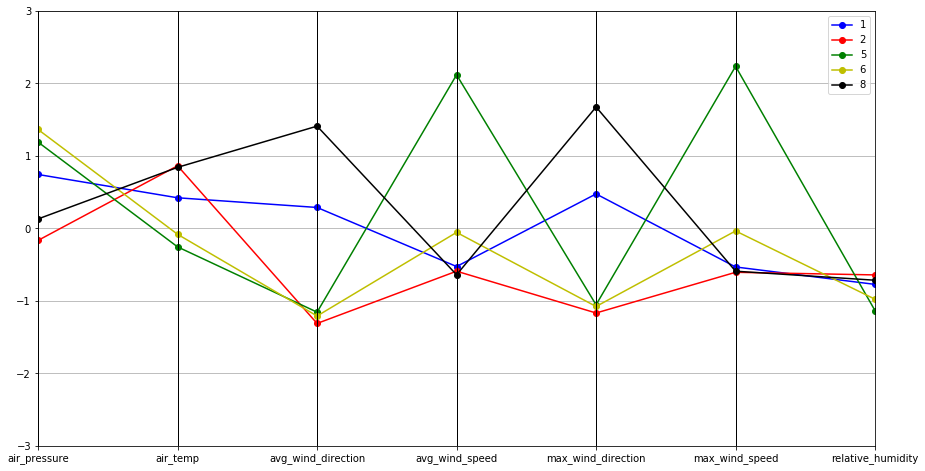

In [58]:
# Dry
parallel_plot(P[P['relative_humidity'] < -0.5])

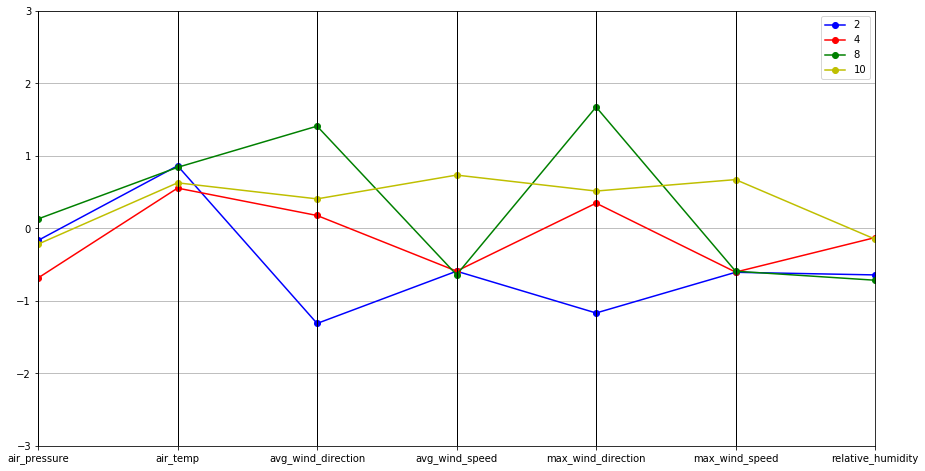

In [60]:
# Warm
parallel_plot(P[P['air_temp'] > 0.5])

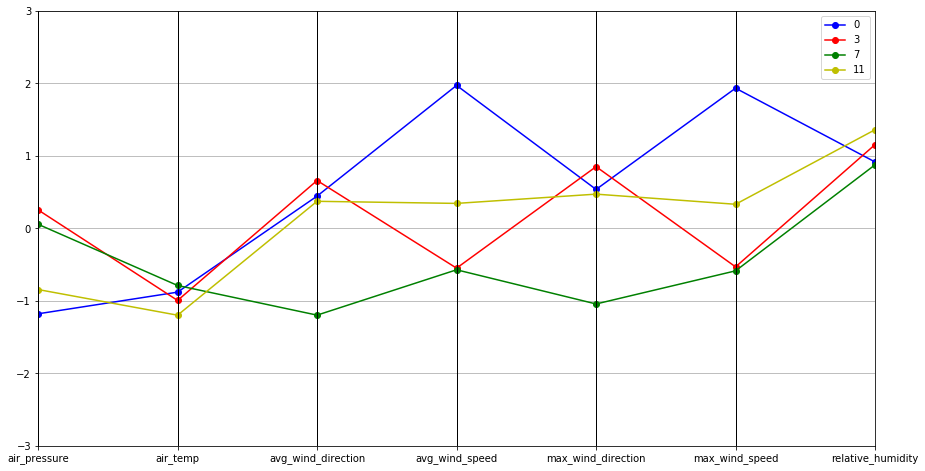

In [61]:
# Cool
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])